In [1]:
import zfit 
import numpy as np
import tensorflow as tf
import scipy.stats
from zfit import z
import random

class HistPDF(zfit.pdf.BasePDF):

    def __init__(self, hist_args, hist_bins, obs, name='HistPDF'):
        self.rv_hist = scipy.stats.rv_histogram([hist_args, hist_bins])  # or something, unsure
        super().__init__(obs=obs, name=name)

    def _unnormalized_pdf(self, x):
        x = z.unstack_x(x)
        probs =  z.py_function(func=self.rv_hist.pdf, inp=[x], Tout=tf.float64)
        probs.set_shape(x.shape)
        return probs

/Users/bootcamp/.local/lib/python3.8/site-packages/zfit/util/execution.py:70: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [2]:
zfit.settings.options['numerical_grad'] = True
obs1 = zfit.Space("x", limits=(0, 10))
obs2 = zfit.Space("x", limits=(0, 10))

mu2 = zfit.Parameter("mu2", 5., step_size=0)
sigma2 = zfit.Parameter("sigma2", 1., step_size=0)
lambd2 = zfit.Parameter("lambda2", -0.2, step_size=0)
frac2 = zfit.Parameter("fraction2", 0.5, 0, 1)
frac1 = zfit.Parameter("fraction1", 0.5, step_size=0)

gauss2 = zfit.pdf.Gauss(mu=mu2, sigma=sigma2, obs=obs2)
exponential2 = zfit.pdf.Exponential(lambd2, obs=obs2)
model2 = zfit.pdf.SumPDF([gauss2, exponential2], fracs=frac2)
# data
n_sample = 100

exp_data = exponential2.sample(n=n_sample * (1 - frac2)).numpy()

gauss_data = gauss2.sample(n=n_sample * frac2).numpy()
data = model2.create_sampler(n_sample, limits=obs2)
data.resample()
data_np = data[:, 0].numpy()

res = []
histogramm = np.histogram(data_np, bins=100)
hist = scipy.stats.rv_histogram(histogramm)
hist_init = HistPDF(histogramm[0], histogramm[1], obs = obs1)
data1 = hist_init.create_sampler(n_sample, limits=obs2)
minimizer = zfit.minimize.Minuit()
data1.resample()
frac2.set_value(0.6)
# nll1 = zfit.loss.UnbinnedNLL(model=model2, data=data1)
# result1 = minimizer.minimize(nll1)

In [3]:
res = []
for i in range(0, 50): 
    data1.resample() 
    frac2.set_value(np.random.random()) 
    nll1 = zfit.loss.UnbinnedNLL(model=model2, data=data1) 
    result1 = minimizer.minimize(nll1) 
    value_stat = list(result1.error().keys())[0] 
    error_stat = list(result1.error().values())[0] 
    frac_value = float(value_stat.value()) 
    frac_up_error = float(error_stat.upper) 
    frac_low_error = float(error_stat.lower) 
    if(frac_value - frac2.value() > 0): 
        frac_error = frac_up_error 
    else: 
        frac_error = abs(frac_low_error) 
    final_value = (0.5-frac_value)/(frac_error) 
    if (abs(final_value) < 20): 
        res.append(final_value) 
    print(frac_error)         
    print(frac_value) 
    print(final_value)


------------------------------------------------------------------
| FCN = 189.4                   |     Ncalls=102 (102 total)     |
| EDM = 1.45e-06 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


/Users/bootcamp/.local/lib/python3.8/site-packages/zfit/minimizers/fitresult.py:358: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  warnings.warn("'minuit_minos' will be changed as the default errors method to a custom implementation"


0.08027653314253572
0.6491152326772172
-1.857519586856775
------------------------------------------------------------------
| FCN = 195                     |      Ncalls=97 (97 total)      |
| EDM = 5.05e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.1249009220845992
0.5735022371953266
-0.5884843439789921
------------------------------------------------------------------
| FCN = 201.2

------------------------------------------------------------------
0.0627471907983884
0.8269700843206592
-5.210911917495071
------------------------------------------------------------------
| FCN = 208.9                   |     Ncalls=175 (175 total)     |
| EDM = 5.77e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.07833333995606653
0.3327410792030028
2.135220084970267
---------------

------------------------------------------------------------------
0.07307079297939052
0.4333317591653276
0.9123787783920181
------------------------------------------------------------------
| FCN = 201                     |     Ncalls=124 (124 total)     |
| EDM = 0.000151 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.1394248138037395
0.7167673097000893
-1.5547254737970853
-------------

------------------------------------------------------------------
0.10223565664311567
0.6832773166809799
-1.7926946693438333
------------------------------------------------------------------
| FCN = 190.3                   |     Ncalls=138 (138 total)     |
| EDM = 3.34e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.07070056706558843
0.5582102653524391
-0.8233351975584277
-----------

------------------------------------------------------------------
0.10607496588999363
0.6213048883133552
-1.1435769721496392
------------------------------------------------------------------
| FCN = 192.9                   |     Ncalls=140 (140 total)     |
| EDM = 2.26e-05 (Goal: 0.001)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
0.14590403410632624
0.6549565697245593
-1.0620444504751396
-----------

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 1.,
        0., 1., 0., 0., 0., 2., 3., 3., 1., 2., 5., 3., 5., 1., 3., 3., 2.,
        1., 0., 0., 1., 0., 1., 1., 2., 1., 0., 1., 0., 1., 1., 0., 1.]),
 array([-5.21091192, -5.06398928, -4.91706664, -4.770144  , -4.62322136,
        -4.47629872, -4.32937608, -4.18245344, -4.0355308 , -3.88860816,
        -3.74168552, -3.59476288, -3.44784024, -3.3009176 , -3.15399496,
        -3.00707232, -2.86014968, -2.71322704, -2.5663044 , -2.41938176,
        -2.27245912, -2.12553648, -1.97861384, -1.8316912 , -1.68476856,
        -1.53784592, -1.39092328, -1.24400064, -1.097078  , -0.95015536,
        -0.80323272, -0.65631008, -0.50938744, -0.3624648 , -0.21554216,
        -0.06861952,  0.07830312,  0.22522576,  0.3721484 ,  0.51907104,
         0.66599368,  0.81291632,  0.95983896,  1.1067616 ,  1.25368424,
         1.40060688,  1.54752952,  1.69445216,  1.8413748 ,  1.98829744,
         2.13522008]),
 <a list of 1 Patch o

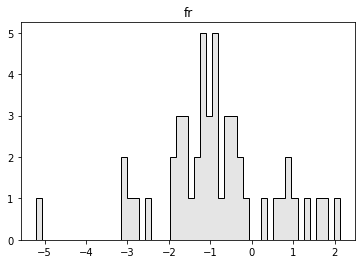

In [4]:
import matplotlib.pyplot as plt 
color = 'black' 
plt.figure() 
plt.title("fr") 
# plot the data 
n, bins, patches = plt.hist(res, color=color, bins=50, histtype="stepfilled", alpha=0.1) 
plt.hist(res, color=color, bins=50, histtype="step")

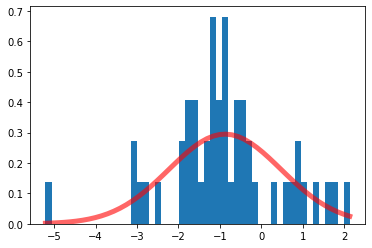

In [5]:
from scipy.stats import norm

mu = zfit.Parameter("mu", 0, -2, 2)
sigma = zfit.Parameter("sigma", 1, 0, 2)
gauss = zfit.pdf.Gauss(mu=mu, sigma=sigma, obs=obs1)

(mu, sigma) = norm.fit(res) 

pdf_x = np.linspace(np.min(res),np.max(res),50)
n, bins, patches = plt.hist(res, bins = 50, density=True,)
plt.plot(pdf_x, norm.pdf(pdf_x, loc = mu, scale = sigma ), 'r-', lw=5, alpha=0.6, label='norm pdf')



In [7]:
print (mu, sigma)

-0.8767916792096939 1.3536928355014728
